In [1]:
#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [2]:
!git clone https://github.com/huggingface/diffusers
%pip install git+https://github.com/huggingface/diffusers
%pip install triton
%pip install accelerate transformers ftfy gradio natsort safetensors
%pip install bitsandbytes

fatal: destination path 'diffusers' already exists and is not an empty directory.
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-bsc9c_78
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-bsc9c_78
  Resolved https://github.com/huggingface/diffusers to commit d1e3f489e909d351ea6abced05b0cdaf3a41be7a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip list | grep torch

torch                            2.2.1+cu121
torchaudio                       2.2.1+cu121
torchdata                        0.7.1
torchsummary                     1.5.1
torchtext                        0.17.1
torchvision                      0.17.1+cu121


In [4]:
# !wget -O civitai_midel.ckpt https://civitai.com/api/download/models/201259?type=Model&format=SafeTensor&size=pruned&fp=fp16
# !wget https://raw.githubusercontent.com/CompVis/stable-diffusion/main/configs/stable-diffusion/v1-inference.yaml

In [5]:
# !python diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py \
#       --checkpoint_path='/content/civitai_midel.ckpt'\
#       --original_config_file='/content/v1-inference.yaml'\
#       --dump_path='/content/cache_dir/models/civitai_model'\
#       --scheduler_type="ddim" --prediction_type='epsilon'\
#       --from_safetensors

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# !cp -r /content/cache_dir/models/civitai_model/ /content/drive/MyDrive/sd

In [8]:
CLASS_NAME = 'woman'

concepts_list = [
    {
        "instance_prompt":      "a photo of sks woman face",
        "class_prompt":         "a photo of woman face",
        "instance_data_dir":    "/content/drive/MyDrive/imgs512x512/",
        "class_data_dir":       f"/content/drive/MyDrive/{CLASS_NAME}"
    }
]

# `class_data_dir` contains regularization images
import json
import os
for c in concepts_list:
    os.makedirs(c["instance_data_dir"], exist_ok=True)

with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)

In [9]:
#@markdown Upload your images by running this cell.

#@markdown OR

#@markdown You can use the file manager on the left panel to upload (drag and drop) to each `instance_data_dir` (it uploads faster). You can also upload your own class images in `class_data_dir` if u don't wanna generate with SD.

import os
from google.colab import files
import shutil

for c in concepts_list:
    print(f"Uploading instance images for `{c['instance_prompt']}`")
    uploaded = files.upload()
    for filename in uploaded.keys():
        dst_path = os.path.join(c['instance_data_dir'], filename)
        shutil.move(filename, dst_path)

Uploading instance images for `a photo of sks woman face`


Saving 1__17_.jpeg.bf53993c9b93a28409302423f1e44cfc.jpeg to 1__17_.jpeg.bf53993c9b93a28409302423f1e44cfc.jpeg
Saving 97m4z865hsg_1707292628_1707293742.jpg to 97m4z865hsg_1707292628_1707293742.jpg
Saving 6426dd3add25f618469340.jpg to 6426dd3add25f618469340.jpg
Saving 1463004243_uo1.jpg to 1463004243_uo1.jpg
Saving 1570023560_0_0_2049_1152_1920x0_80_0_0_e89ac4934df1d52ee019a5c408fc0639.jpg to 1570023560_0_0_2049_1152_1920x0_80_0_0_e89ac4934df1d52ee019a5c408fc0639.jpg
Saving 1666363836_2-mykaleidoscope-ru-p-emma-uotson-malenkaya-krasivo-2.jpg to 1666363836_2-mykaleidoscope-ru-p-emma-uotson-malenkaya-krasivo-2.jpg
Saving b77e08031bf311b6d4f3692ff9df4ace.jpg to b77e08031bf311b6d4f3692ff9df4ace.jpg
Saving e1d060b6e3b2496821fb8c16caa1e40f.jpg to e1d060b6e3b2496821fb8c16caa1e40f.jpg
Saving emma_watson_detail.jpg to emma_watson_detail.jpg
Saving Emma-Uotson.jpg to Emma-Uotson.jpg
Saving emma-watson-attends-the-kering-foundations-caring-for-women-dinner-at-the-pool-on-park-avenue-in-new-york-cit

In [10]:
import os
os.environ['INSTANCE_DIR'] = "/content/drive/MyDrive/imgs512x512/"
os.environ['CLASS_DIR'] = f"/content/drive/MyDrive/{CLASS_NAME}"

os.environ['MODEL_NAME'] = "/content/drive/MyDrive/sd/civitai_model/"
os.environ['OUTPUT_DIR'] = "/content/drive/MyDrive/sd-exp"

In [15]:
!python3 /content/diffusers/examples/dreambooth/train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a photo of sks woman face" \
  --class_prompt="a photo of woman face " \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --gradient_accumulation_steps=1 \
  --num_class_images=500 \
  --max_train_steps=800 \
  --checkpointing_steps=800 \
  --use_8bit_adam \
  --mixed_precision="no"\
  --train_text_encoder

2024-04-21 18:41:41.132602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 18:41:41.134190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 18:41:41.142494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 18:41:42.903127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/21/2024 18:41:44 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

Loading pipeline components...:   0% 0/6 [00:00<?, ?it/s]Loaded text_encoder

In [16]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display
import os

model_path = os.environ['OUTPUT_DIR']

pipe = StableDiffusionPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
g_cuda=None

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [17]:
#@markdown Can set random seed here for reproducibility.
g_cuda = torch.Generator(device='cuda')
seed = 345252 #@param {type:"number"}
g_cuda.manual_seed(seed)

  0%|          | 0/35 [00:00<?, ?it/s]

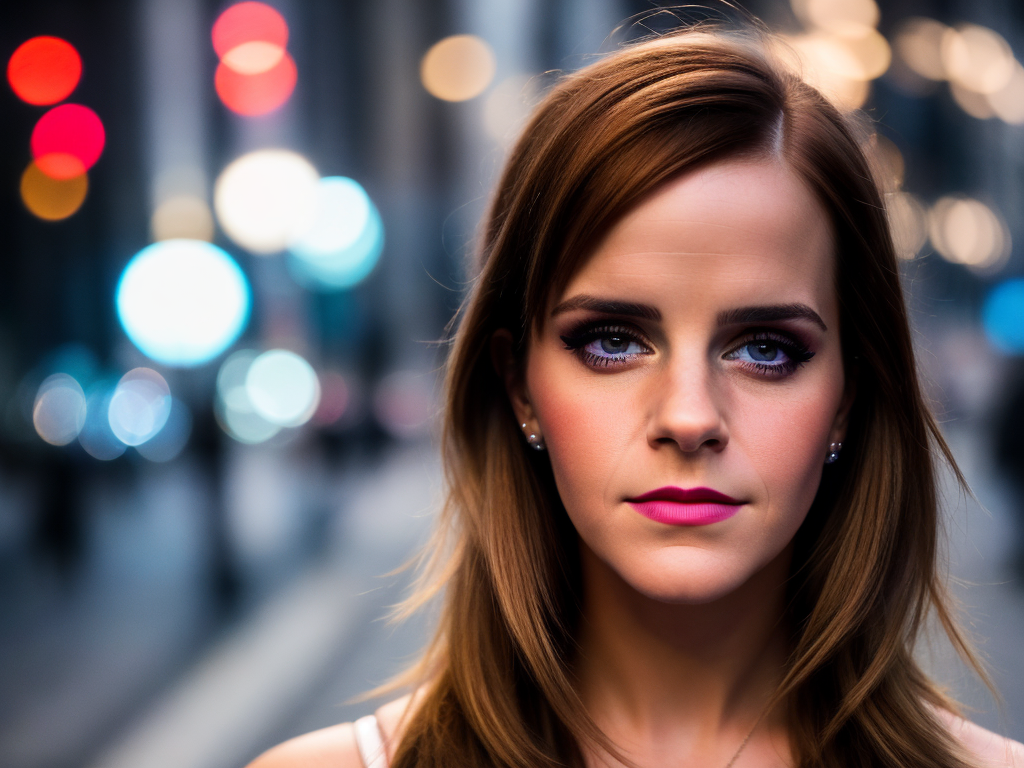

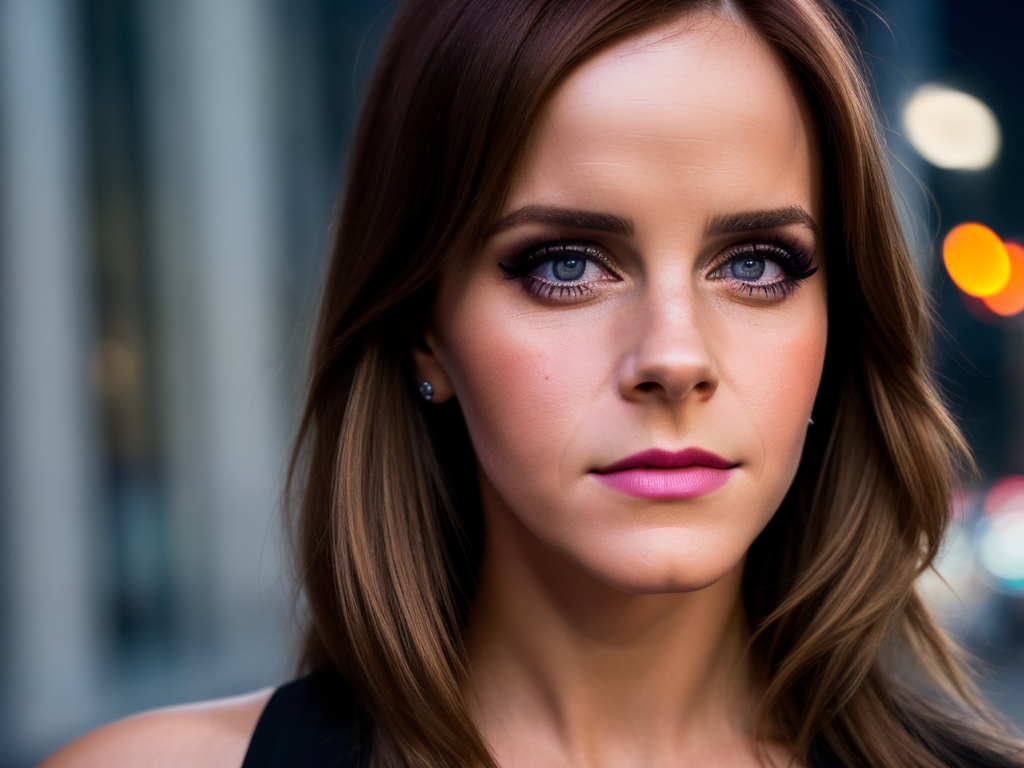

In [19]:
#@title Run for generating images.

prompt = "portrait of sks woman face, on the street, lights, midnight, NY, standing, 4K, raw, hrd, hd, high quality, realism, sharp focus,  beautiful eyes, detailed eyes" #@param {type:"string"}
negative_prompt = "naked, nsfw, deformed, distorted, disfigured, poorly drawn, bad anatomy, extra limb, missing limb, floating limbs, mutated hands disconnected limbs, mutation, ugly, blurry, amputation" #@param {type:"string"}
num_samples = 2 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
num_inference_steps = 35 #@param {type:"number"}
height = 768 #@param {type:"number"}
width = 1024 #@param {type:"number"}

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)